1a.

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


I decided to use the Iris dataset from the Seaborn library. It contains measurements of 150 different iris flowers and includes the length and width of its sepals and petals.

1b. Since we are using the Seaborn library no extra extraction is required

2a. Dataset has been imported into our Jupyter Notebook

In [48]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

2b. Output shows there are no missing values.

In [49]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


2c. Checking values to see if there are any incorrect data, here we see the minimum value for sepal_width is 2 which could be incorrect we can use a boxplot to look for outliers.

<Axes: xlabel='sepal_width'>

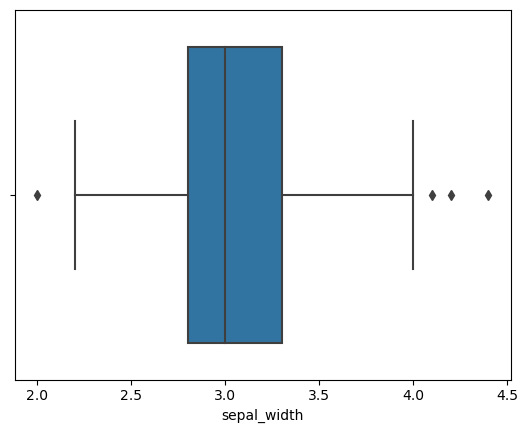

In [50]:
sns.boxplot(x=iris['sepal_width'])

We can see that there are indeed a few outliers in the dataset so I will remove them from the dataset.

In [51]:
q1 = iris['sepal_width'].quantile(0.25)
q3 = iris['sepal_width'].quantile(0.75)
iqr = q3 - q1

iris = iris[(iris['sepal_width'] >= q1 - 1.5*iqr) & (iris['sepal_width'] <= q3 + 1.5*iqr)]

In [52]:
iris_groups = iris.groupby('species')

2d. We can create this group object to seperate dataframes for each unique species. We can use this group object to perform operations on each group such as calculating the mean sepal length for each species.

In [53]:
sepal_length_means = iris_groups['sepal_length'].mean()
sepal_length_means

species
setosa        4.976596
versicolor    5.955102
virginica     6.588000
Name: sepal_length, dtype: float64

In [54]:
def label_species(species_name):
    if species_name == 'setosa':
        return 0
    elif species_name == 'versicolor':
        return 1
    elif species_name == 'virginica':
        return 2
    else:
        return None

In [55]:
iris['species_label'] = iris['species'].map(label_species)
iris['species_label']


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_label, Length: 146, dtype: int64

2e. This function creates a new column and converts the species name into a more digestable numerical label for easier analysis. 

In [56]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_label
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548,1.020548
std,0.834093,0.397853,1.758042,0.759393,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


3a. .describe() gives us the max, min, and average values of all the numberical data.

In [57]:
iris.groupby('species').agg(['max', 'min', 'mean'])

sepal_length                sepal_width                 \
                    max  min      mean         max  min      mean   
species                                                             
setosa              5.8  4.3  4.976596         4.0  2.3  3.376596   
versicolor          7.0  4.9  5.955102         3.4  2.2  2.785714   
virginica           7.9  4.9  6.588000         3.8  2.2  2.974000   

           petal_length                petal_width                 \
                    max  min      mean         max  min      mean   
species                                                             
setosa              1.9  1.0  1.461702         0.6  0.1  0.246809   
versicolor          5.1  3.0  4.275510         1.8  1.0  1.332653   
virginica           6.9  4.5  5.552000         2.5  1.4  2.026000   

           species_label           
                     max min mean  
species                            
setosa                 0   0  0.0  
versicolor             1   1  1.0  
virginica              2   2  2.0

3b. We can see the aggregate max, min, and average categorically by species here.

In [58]:
iris['petal_ratio'] = iris['petal_length'] / iris['petal_width']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,0,7.0
1,4.9,3.0,1.4,0.2,setosa,0,7.0
2,4.7,3.2,1.3,0.2,setosa,0,6.5
3,4.6,3.1,1.5,0.2,setosa,0,7.5
4,5.0,3.6,1.4,0.2,setosa,0,7.0


3c. Here we are adding a new column that gives the ratio of petal length to petal width.

3d. No related data to merge into dataset.

In [59]:
iris.groupby('species')[['sepal_length', 'sepal_width', 'petal_width', 'petal_length', 'petal_ratio']].mean()


,sepal_length,sepal_width,petal_width,petal_length,petal_ratio
species,,,,,
setosa,4.976596,3.376596,0.246809,1.461702,6.801064
versicolor,5.955102,2.785714,1.332653,4.275510,3.237589
virginica,6.588000,2.974000,2.026000,5.552000,2.780662


3e. Here we can see the mean length and width of the sepals of each species.

3f. So using this analysis we can conclude that the setosa species has the shortest petal length and width overall, but virginica has the closest ratio of petal_width to petal_length.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

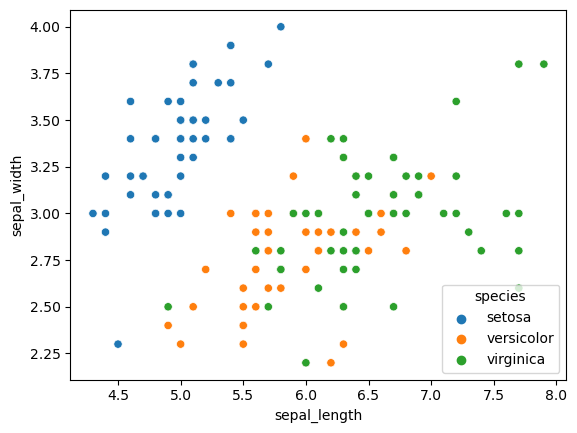

In [60]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

4a. Here we are comparing the sepal_length (x axis) and sepal_width (y axis) between the species.

C:\Users\alecw\AppData\Local\Temp\ipykernel_21952\3571828891.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal_length', data=iris, ci=None)


<Axes: xlabel='species', ylabel='petal_length'>

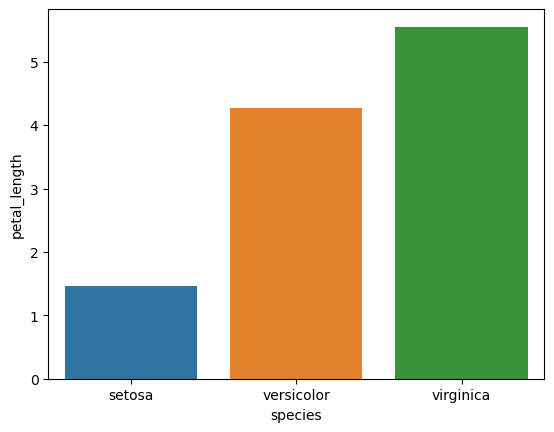

In [61]:
sns.barplot(x='species', y='petal_length', data=iris, ci=None)



<Axes: xlabel='species', ylabel='sepal_width'>

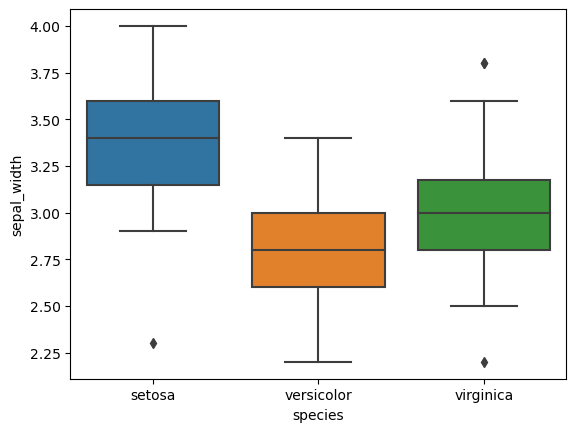

In [62]:
sns.boxplot(x='species', y='sepal_width', data=iris)

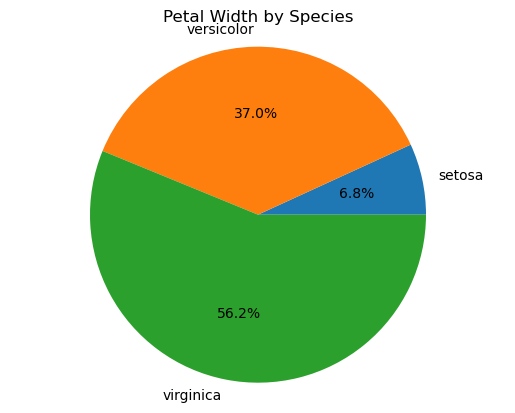

In [63]:
import matplotlib.pyplot as plt
petal_width = iris.groupby('species')['petal_width'].mean()

plt.pie(petal_width, labels=petal_width.index, autopct = '%1.1f%%')
plt.title("Petal Width by Species")
plt.axis('equal')
plt.show()

4b. We can compare many different data points using graphs our bar graph contrasts the petal lengths of the species, the box plot shows the sepal widths, and our pie chart shows the petal widths.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Load the iris dataset
iris = sns.load_dataset('iris')

# Define the pie chart function
def plot_pie(column):
    data = iris.groupby('species').mean()[column]
    plt.pie(data, labels=data.index)
    plt.title(f"Mean {column} by Species")
    plt.show()

# Create the interactive widget
column_dropdown = widgets.Dropdown(options=['petal_length', 'petal_width', 'sepal_width', 'sepal_length'], description='Column')
widgets.interact(plot_pie, column=column_dropdown)


interactive(children=(Dropdown(description='Column', options=('petal_length', 'petal_width', 'sepal_width', 's…

<function __main__.plot_pie(column)>

4c. The user can choose to compare the width or length of the petal or sepal of each species on this pie chart.